<a href="https://colab.research.google.com/github/krsna-thecoder/CNN---DEEP-LEARNING/blob/main/cnnONfmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# To load the mnist data
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

# importing various types of hidden layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Adam optimizer for better LR and less loss
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Split the data into training and testing
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Print the dimensions of the dataset
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


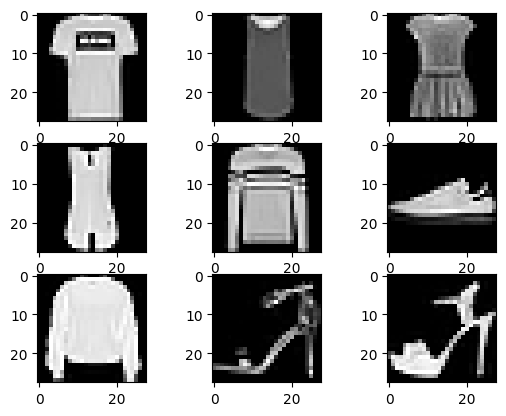

In [3]:
for i in range(1, 10):
    # Create a 3x3 grid and place the
    # image in ith position of grid
    plt.subplot(3, 3, i)
    # Insert ith image with the color map 'grap'
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

# Display the entire plot
plt.show()

In [4]:
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print(trainX.shape)

(60000, 28, 28, 1)


In [5]:
def model_arch():
    models = Sequential()

    # We are learning 64
    # filters with a kernel size of 5x5
    models.add(Conv2D(64, (5, 5),
                      padding="same",
                      activation="relu",
                      input_shape=(28, 28, 1)))

    # Max pooling will reduce the
    # size with a kernel size of 2x2
    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(128, (5, 5), padding="same",
                      activation="relu"))

    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(256, (5, 5), padding="same",
                      activation="relu"))

    models.add(MaxPooling2D(pool_size=(2, 2)))

    # Once the convolutional and pooling
    # operations are done the layer
    # is flattened and fully connected layers
    # are added
    models.add(Flatten())
    models.add(Dense(256, activation="relu"))

    # Finally as there are total 10
    # classes to be added a FCC layer of
    # 10 is created with a softmax activation
    # function
    models.add(Dense(10, activation="softmax"))
    return models

In [6]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,618,698 (6.17 MB)

 Trainable params: 1,618,698 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
from keras.datasets import fashion_mnist

# Load and preprocess data
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

def model_arch():
    models = Sequential()

    # We are learning 64
    # filters with a kernel size of 5x5
    models.add(Conv2D(64, (5, 5),
                      padding="same",
                      activation="relu",
                      input_shape=(28, 28, 1)))

    # Max pooling will reduce the
    # size with a kernel size of 2x2
    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(128, (5, 5), padding="same",
                      activation="relu"))

    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(256, (5, 5), padding="same",
                      activation="relu"))

    models.add(MaxPooling2D(pool_size=(2, 2)))

    # Once the convolutional and pooling
    # operations are done the layer
    # is flattened and fully connected layers
    # are added
    models.add(Flatten())
    models.add(Dense(256, activation="relu"))

    # Finally as there are total 10
    # classes to be added a FCC layer of
    # 10 is created with a softmax activation
    # function
    models.add(Dense(10, activation="softmax"))
    return models

model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

history = model.fit(
    trainX.astype(np.float32), trainy.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.33
)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - loss: 8.3828 - sparse_categorical_accuracy: 0.4712 - val_loss: 0.4084 - val_sparse_categorical_accuracy: 0.8499
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.3673 - sparse_categorical_accuracy: 0.8686 - val_loss: 0.3377 - val_sparse_categorical_accuracy: 0.8814
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.2990 - sparse_categorical_accuracy: 0.8907 - val_loss: 0.2883 - val_sparse_categorical_accuracy: 0.8963
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.2501 - sparse_categorical_accuracy: 0.9104 - val_loss: 0.2905 - val_sparse_categorical_accuracy: 0.8936
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.2255 - sparse_categorical_accuracy: 0.9189 - val_loss: 0.2719 - val_sparse_categorical_accuracy: 0.9047
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.1871 - sparse_categorical_accuracy: 0.9321 - val_loss: 0.2920 - val_sparse_categorical_accuracy: 0.8

In [8]:
model.save_weights('./model.weights.h5', overwrite=True)

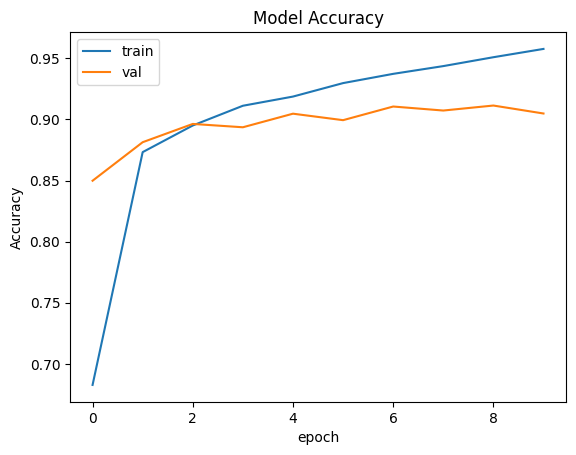

In [10]:
import matplotlib.pyplot as plt

# Accuracy vs Epoch plot
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

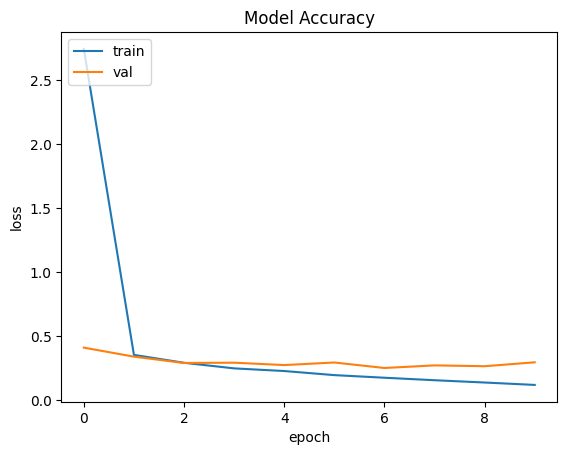

In [11]:
# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step
ankle_boots


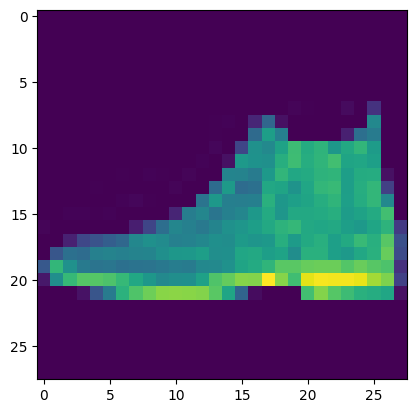

In [12]:
# There are 10 output labels for the Fashion MNIST dataset
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
# Make a prediction
predictions = model.predict(testX[:1])
label = labels[np.argmax(predictions)]

print(label)
plt.imshow(testX[:1][0])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: Pullover
Prediction confidence: 0.11193665


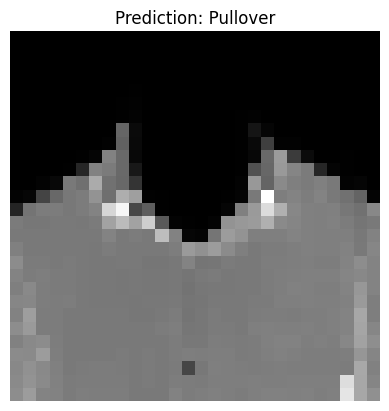

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load and preprocess the image
def preprocess_image(image_path):
    # Read image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize to 28x28
    img = cv2.resize(img, (28, 28))

    # Invert image if background is white
    img = 255 - img

    # Normalize (same as Fashion MNIST)
    img = img / 255.0

    # Reshape to (1, 28, 28, 1) for CNN
    img = img.reshape(1, 28, 28, 1)

    return img


# Class labels of Fashion MNIST
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]


# Path to your custom image
image_path = "//content/shirt pic for test.jpg"   # change path if needed

# Preprocess image
processed_image = preprocess_image(image_path)

# Predict
prediction = model.predict(processed_image)
predicted_class = np.argmax(prediction)

# Output
print("Predicted class:", class_names[predicted_class])
print("Prediction confidence:", np.max(prediction))

# Show image
plt.imshow(processed_image.reshape(28, 28), cmap='gray')
plt.title(f"Prediction: {class_names[predicted_class]}")
plt.axis('off')
plt.show()


In [16]:
import numpy as np

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(testX, testy, verbose=1)

print(f"Test Accuracy on Fashion-MNIST: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3298 - sparse_categorical_accuracy: 0.9001
Test Accuracy on Fashion-MNIST: 89.84%
Test Loss: 0.3340
